### Based on [Pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

In [118]:
import pandas as pd
import seaborn as sns

In [119]:
df0 = sns.load_dataset('penguins')

## Creating DataFrames

In [ ]:
# Method 1: specify values for each column
df1 = pd.DataFrame({"col1": [1,2,3], 
                    "col2": [4,5,6],
                    "col3": [7,8,9]},
                  index = [0,1,2])
df1

,col1,col2,col3
0,1,4,7
1,2,5,8
2,3,6,9


In [ ]:
# Method 2: specify values for each row
df2 = pd.DataFrame([[10,11,12],
                    [13,14,15],
                    [16,17,18]],
                  index=[0,1,2],
                  columns=['col1','col2','col3'])
df2

,col1,col2,col3
0,10,11,12
1,13,14,15
2,16,17,18


In [ ]:
# Method 3: create DataFrame with MultiIndex
df3 = pd.DataFrame({"col1": [19,20,21],
                    "col2": [22,23,24],
                    "col3": [25, 26, 27]},
                  index = pd.MultiIndex.from_tuples(
                          [('d', 1), ('d', 2),
                           ('e', 2)], names=['n', 'v']))
df3

col1  col2  col3
n v                  
d 1    19    22    25
  2    20    23    26
e 2    21    24    27

## Reshaping data

In [ ]:
# Melting: gathering columns into rows
melted_df0 = pd.melt(df0)
melted_df0

,variable,value
0,species,Adelie
1,species,Adelie
2,species,Adelie
3,species,Adelie
4,species,Adelie
...,...,...
2403,sex,NaN
2404,sex,FEMALE
2405,sex,MALE
2406,sex,FEMALE


In [ ]:
# Concatenating two DataFrames by row
df_concat = pd.concat([df1, df2], ignore_index=True)
df_concat

,col1,col2,col3
0,1,4,7
1,2,5,8
2,3,6,9
3,10,11,12
4,13,14,15
5,16,17,18


In [ ]:
# Concatenating two DataFrames by column
df4 = pd.DataFrame({'col4': [10,11,12],
                    'col5': [13,14,15],
                    'col6': [16,17,18]},
                  index=[0,1,2])

df_concat_col = pd.concat([df1, df4], axis=1)
df_concat_col

,col1,col2,col3,col4,col5,col6
0,1,4,7,10,13,16
1,2,5,8,11,14,17
2,3,6,9,12,15,18


In [ ]:
# Sorting rows by column values (ascending)
df0_LtH = df0.sort_values(by='flipper_length_mm')
df0_LtH

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
28,Adelie,Biscoe,37.9,18.6,172.0,3150.0,FEMALE
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,FEMALE
122,Adelie,Torgersen,40.2,17.0,176.0,3450.0,FEMALE
31,Adelie,Dream,37.2,18.1,178.0,3900.0,MALE
30,Adelie,Dream,39.5,16.7,178.0,3250.0,FEMALE
...,...,...,...,...,...,...,...
285,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,MALE
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE
283,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,MALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Sorting rows by column values (descending)
df0_HtL = df0.sort_values(by='flipper_length_mm', ascending=False)
df0_HtL

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
283,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,MALE
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
285,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,MALE
295,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,MALE
...,...,...,...,...,...,...,...
122,Adelie,Torgersen,40.2,17.0,176.0,3450.0,FEMALE
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,FEMALE
28,Adelie,Biscoe,37.9,18.6,172.0,3150.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Rename columns
df0_renamed = df0.rename(columns={'body_mass_g':'body mass in grams'})
df0_renamed

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body mass in grams,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
# Sort index
df5 = pd.DataFrame({"col1": [1,2,3], 
                    "col2": [4,5,6],
                    "col3": [7,8,9]},
                  index = [1, 0, 2])
df5.sort_index(inplace=True)
df5

,col1,col2,col3
0,2,5,8
1,1,4,7
2,3,6,9


In [ ]:
# Reset index
df6 = pd.DataFrame({"col1": [1,2,3], 
                    "col2": [4,5,6],
                    "col3": [7,8,9]},
                  index = ['idx1', 'idx2', 'idx3'])
df6.reset_index(inplace=True)
df6

,index,col1,col2,col3
0,idx1,1,4,7
1,idx2,2,5,8
2,idx3,3,6,9


In [ ]:
# Drop columns from DataFrame
df0_dropped = df0.drop(columns=['culmen_length_mm', 'sex'])
df0_dropped

,species,island,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,18.7,181.0,3750.0
1,Adelie,Torgersen,17.4,186.0,3800.0
2,Adelie,Torgersen,18.0,195.0,3250.0
3,Adelie,Torgersen,NaN,NaN,NaN
4,Adelie,Torgersen,19.3,193.0,3450.0
...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN
340,Gentoo,Biscoe,14.3,215.0,4850.0
341,Gentoo,Biscoe,15.7,222.0,5750.0
342,Gentoo,Biscoe,14.8,212.0,5200.0


## Subset operations

In [ ]:
# Index rows by logical criteria
df0_subs1 = df0[df0.culmen_depth_mm>21]
df0_subs1

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,MALE
35,Adelie,Dream,39.2,21.1,196.0,4150.0,MALE
49,Adelie,Dream,42.3,21.2,191.0,4150.0,MALE
61,Adelie,Biscoe,41.3,21.1,195.0,4400.0,MALE


In [ ]:
# Remove duplicate rows
df7 = pd.DataFrame([[1,2,3], 
                    [4,5,6],
                    [7,8,9],
                    [7,8,9]],
                  columns = ['col1', 'col2', 'col3'])
df7_dedup = df7.drop_duplicates()
df7_dedup

,col1,col2,col3
0,1,2,3
1,4,5,6
2,7,8,9


In [ ]:
# Randomly sample rows (by fraction)
df0_rsample = df0.sample(frac=0.01) # sample 1% of the rows
df0_rsample

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
209,Chinstrap,Dream,49.3,19.9,203.0,4050.0,MALE
311,Gentoo,Biscoe,52.2,17.1,228.0,5400.0,MALE
231,Gentoo,Biscoe,49.0,16.1,216.0,5550.0,MALE


In [ ]:
# Randomly sample rows (by quantity)
df0_rsample2 = df0.sample(n=5)
df0_rsample2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
268,Gentoo,Biscoe,44.9,13.3,213.0,5100.0,FEMALE
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,MALE
320,Gentoo,Biscoe,48.5,15.0,219.0,4850.0,FEMALE
304,Gentoo,Biscoe,44.9,13.8,212.0,4750.0,FEMALE
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,FEMALE


In [ ]:
# Select and order top n entries
df0_nlargest = df0.nlargest(n=5, columns='body_mass_g')
df0_nlargest

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,MALE
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,MALE
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
299,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,MALE


In [ ]:
# Select and order n smallest entries
df0_nsmallest = df0.nsmallest(n=5, columns='body_mass_g')
df0_nsmallest

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
190,Chinstrap,Dream,46.9,16.6,192.0,2700.0,FEMALE
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,FEMALE
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,FEMALE
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,FEMALE
98,Adelie,Dream,33.1,16.1,178.0,2900.0,FEMALE


In [ ]:
# Select first n rows
df0.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [ ]:
# Select last n rows
df0.tail(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [ ]:
# Select multiple columns
df0[['species', 'island', 'sex']].head()

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,FEMALE


In [ ]:
# Index into one column
df0['species'].head()

0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: species, dtype: object

In [ ]:
# (alternate) Index into one column
df0.species.head()

0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: species, dtype: object

In [ ]:
# Select columns whose name matches regex expression
df0.filter(regex='^[aeiouAEIOU][A-Za-z0-9_]*').head() # select columns whose name starts with a vowel

,island
0,Torgersen
1,Torgersen
2,Torgersen
3,Torgersen
4,Torgersen


In [ ]:
# Filter using query
df0.query('body_mass_g > 5000.0 and culmen_depth_mm < 16.0').head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
227,Gentoo,Biscoe,46.7,15.3,219.0,5200.0,MALE
229,Gentoo,Biscoe,46.8,15.4,215.0,5150.0,MALE
233,Gentoo,Biscoe,48.4,14.6,213.0,5850.0,MALE


In [ ]:
# Row slicing
df0.iloc[15:18]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
15,Adelie,Torgersen,36.6,17.8,185.0,3700.0,FEMALE
16,Adelie,Torgersen,38.7,19.0,195.0,3450.0,FEMALE
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,MALE


In [ ]:
# Column indexing
df0.iloc[:, [0, 2, 5]].head() # select columns at positions 0, 2, and 5

,species,culmen_length_mm,body_mass_g
0,Adelie,39.1,3750.0
1,Adelie,39.5,3800.0
2,Adelie,40.3,3250.0
3,Adelie,NaN,NaN
4,Adelie,36.7,3450.0


In [ ]:
# Column slicing
df0.loc[:, 'island':'culmen_depth_mm'].head()

,island,culmen_length_mm,culmen_depth_mm
0,Torgersen,39.1,18.7
1,Torgersen,39.5,17.4
2,Torgersen,40.3,18.0
3,Torgersen,NaN,NaN
4,Torgersen,36.7,19.3


In [ ]:
# Logical row indexing
df0.loc[df0['culmen_length_mm'] > 35, :].head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
# Access single value by index
df0.iat[1, 5] # value at second row, sixth column

3800.0

In [ ]:
# Access single value by label
df0.at[4, 'culmen_length_mm'] # value in fifth row in given column

36.7

## Method chaining

In [ ]:
# Example: Query --> drop --> sort
df0.query('flipper_length_mm > 200.0').drop(columns=['island', 'sex']).sort_values(by='culmen_depth_mm')

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
244,Gentoo,42.9,13.1,215.0,5000.0
220,Gentoo,46.1,13.2,211.0,4500.0
268,Gentoo,44.9,13.3,213.0,5100.0
228,Gentoo,43.3,13.4,209.0,4400.0
236,Gentoo,42.0,13.5,210.0,4150.0
...,...,...,...,...,...
191,Chinstrap,53.5,19.9,205.0,4500.0
181,Chinstrap,52.8,20.0,205.0,4550.0
101,Adelie,41.0,20.0,203.0,4725.0
189,Chinstrap,52.0,20.7,210.0,4800.0


## Summarizing data

In [ ]:
# Count number of rows with each unique value of variable
df0['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [ ]:
# Number of rows in DataFrame
len(df0)

344

In [ ]:
# Shape of DataFrame
df0.shape

(344, 7)

In [ ]:
# Number of unique values in a column
df0['sex'].nunique()

3

In [ ]:
# Descriptive statistics for each column
df0.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
# Correlations among columns
df0.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [ ]:
# Sum the values in each column
df0.sum()

species              AdelieAdelieAdelieAdelieAdelieAdelieAdelieAdel...
island               TorgersenTorgersenTorgersenTorgersenTorgersenT...
culmen_length_mm                                               15021.3
culmen_depth_mm                                                 5865.7
flipper_length_mm                                                68713
body_mass_g                                                  1.437e+06
dtype: object

In [ ]:
# Count of non-null values for each column
df0.count()

species              344
island               344
culmen_length_mm     342
culmen_depth_mm      342
flipper_length_mm    342
body_mass_g          342
sex                  334
dtype: int64

In [ ]:
# Individual summary statistics
print(f'Min body mass:', df0['body_mass_g'].min())
print(f'Max body mass:', df0['body_mass_g'].max())
print(f'Mean body mass:', df0['body_mass_g'].mean())
print(f'Median body mass:', df0['body_mass_g'].median())
print(f'Variance in body mass:', df0['body_mass_g'].var())
print(f'Standard deviation in body mass:', df0['body_mass_g'].std())
print(f'Quantile range of body mass:\n', df0['body_mass_g'].quantile([0.25, 0.75]))

Min body mass: 2700.0
Max body mass: 6300.0
Mean body mass: 4201.754385964912
Median body mass: 4050.0
Variance in body mass: 643131.0773267477
Standard deviation in body mass: 801.9545356980954
Quantile range of body mass:
 0.25    3550.0
0.75    4750.0
Name: body_mass_g, dtype: float64


In [ ]:
# Applying a custom function to the DataFrame
def square(x):
  return x**2
df0['culmen_depth_mm'].apply(square)

0      349.69
1      302.76
2      324.00
3         NaN
4      372.49
        ...  
339       NaN
340    204.49
341    246.49
342    219.04
343    259.21
Name: culmen_depth_mm, Length: 344, dtype: float64

## Handling missing data

In [ ]:
# Drop rows with null values
df0.dropna().head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
# Replace null data with given value
df0.fillna(value=0).head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Creating new columns

In [ ]:
# Compute and append new columns
df0.assign(culmen_length_X_depth=lambda df0: df0.culmen_length_mm*df0.culmen_depth_mm).head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_length_X_depth
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,731.17
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,687.30
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,725.40
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,708.31


In [ ]:
# Append a single column
df0['culmen_length_X_depth'] = df0.culmen_length_mm * df0.culmen_depth_mm
df0.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_length_X_depth
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,731.17
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,687.30
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,725.40
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,708.31


In [ ]:
df0.drop(columns=['culmen_length_X_depth'], inplace=True) # get rid of that added column

In [ ]:
# Bin column into n buckets
pd.qcut(df0['flipper_length_mm'], 5, labels=False)

0      0.0
1      0.0
2      2.0
3      NaN
4      1.0
      ... 
339    NaN
340    3.0
341    4.0
342    3.0
343    3.0
Name: flipper_length_mm, Length: 344, dtype: float64

In [ ]:
# Clip value range
df0['body_mass_g'].clip(lower=4000, upper=5500)

0      4000.0
1      4000.0
2      4000.0
3         NaN
4      4000.0
        ...  
339       NaN
340    4850.0
341    5500.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 344, dtype: float64

In [ ]:
# Absolute value
df0['flipper_length_mm'].abs()

0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339      NaN
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 344, dtype: float64

## Combining datasets

In [ ]:
# Join matching rows (left)
df8 = pd.DataFrame({'col1': ['A', 'B', 'C'],
                    'col2': [1, 2, 3]})
df9 = pd.DataFrame({'col1': ['A', 'B', 'C'],
                    'col3': [4, 5, 6]})
pd.merge(df8, df9, how='left', on='col1')

,col1,col2,col3
0,A,1,4
1,B,2,5
2,C,3,6


In [ ]:
# Join matching rows (right)
df8 = pd.DataFrame({'col1': ['A', 'B', 'C'],
                    'col2': [1, 2, 3]})
df9 = pd.DataFrame({'col1': ['A', 'B', 'C'],
                    'col3': [4, 5, 6]})
pd.merge(df9, df8, how='right', on='col1')

,col1,col3,col2
0,A,4,1
1,B,5,2
2,C,6,3


In [ ]:
# Join data, retaining only rows in both datasets
df10 = pd.DataFrame({'col1': ['A', 'B', 'D'],
                     'col3': [4, 5, 6]})
pd.merge(df8, df10, how='inner', on='col1')

,col1,col2,col3
0,A,1,4
1,B,2,5


In [ ]:
# Join data, retaining all rows
pd.merge(df8, df10, how='outer', on='col1')

,col1,col2,col3
0,A,1.0,4.0
1,B,2.0,5.0
2,C,3.0,NaN
3,D,NaN,6.0


In [ ]:
# Retain rows appearing in df8 but not df10 (set difference)
pd.merge(df8, df10, how='outer', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

,col1,col2,col3
2,C,3.0,NaN


## Grouping data

In [ ]:
# Return a GroupBy object, grouped by values in given column
df0.groupby(by='culmen_length_mm')

In [ ]:
# Return a GroupBy object, grouped by values in given index level
df0.groupby(level=0)

In [ ]:
# Get size of each group
df0.groupby(by='species').size()

species
Adelie       152
Chinstrap     68
Gentoo       124
dtype: int64

In [ ]:
# Aggregate group using given function(s)
df0.agg('mean')

culmen_length_mm       43.921930
culmen_depth_mm        17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

## Windows

In [ ]:
# Return an Expanding object that allows summary functions to be applied cumulatively
df0.expanding()

Expanding [min_periods=1,center=False,axis=0]

In [ ]:
# Return a Rolling object that allows summary functions to be applied to windows of length n
df0.rolling(10)

Rolling [window=10,center=False,axis=0]

## Plotting

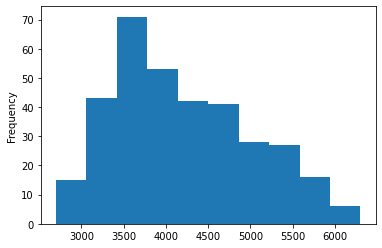

In [ ]:
# Histogram for each column
df0.body_mass_g.plot.hist()

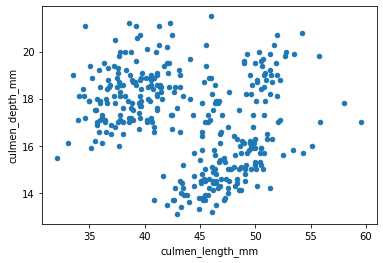

In [ ]:
# Scatterplot
df0.plot.scatter(x='culmen_length_mm', y='culmen_depth_mm')